# Practica: Prediccion Precio Viviendas Airbnb

En este notebook realizaremos un proyecto de Machine Learning en el que utilizaremos los conceptos y tecnicas aprendidas durante el modulo de 'Machine Learning 101' del Bootcamp de Keepcoding.

Se trata de un problema de regresión, en el que prediciremos el precio final de ciertas viviendas de Airbnb teniendo en cuenta sus caracteristicas.

## Librerias y Funciones

Ahora, cargaremos las librerias y funciones que utilizaremos a lo largo del notebook.

In [349]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [19]:
pd.set_option('display.max_columns', None)

## Carga del Dataset y Analisis Exploratorio de los Datos

En esta seccion, haremos un filtrado de las dimensiones relevantes para la prediccion del precio de la vivienda. Así como un tratamiento de los valores nulos para las columnas que mantengamos, filtrandolos en algunos casos y transformandolos en otros.

Por ultimo guardaremos el dataset transformado como cleansed_data.

In [166]:
data = pd.read_csv('airbnb-listings.csv', sep=';', decimal='.')

In [167]:
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,13994948,https://www.airbnb.com/rooms/13994948,20170402075052,2017-04-02,Cozy Duplex in De Pijp,An exceptional and quite house with all you ne...,"The house has 2 floors. In the first floor, yo...",An exceptional and quite house with all you ne...,none,De Pijp is one of the most cosmopolitan and vi...,NaN,"The closest tram stop to the house, Lutmanstra...","As per stay with us, you'll be sharing all the...","Usually we are working during work ours, other...",* Eating inside the bedroom is not allowed. * ...,https://a0.muscache.com/im/pictures/7d24d221-a...,https://a0.muscache.com/im/pictures/7d24d221-a...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/7d24d221-a...,4742444,https://www.airbnb.com/users/show/4742444,Javi,2013-01-17,"Amsterdam, North Holland, The Netherlands","Javi, born in '88 in Madrid, Spain.\r\n\r\nSel...",within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/b65cac92-1...,https://a0.muscache.com/im/pictures/b65cac92-1...,De Pijp,2.0,2.0,"email,phone,facebook,reviews,jumio,work_email","De Pijp, Amsterdam, Noord-Holland 1074 VM, Net...",De Pijp,De Pijp - Rivierenbuurt,NaN,Amsterdam,Noord-Holland,1074 VM,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.352700,4.904824,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wireless Internet,Kitchen,Heating,...",NaN,80.0,NaN,NaN,200.0,25.0,1,0,3,6,6 days ago,NaN,0,2,2,2,2017-04-02,12,2016-07-24,2017-03-26,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,Amsterdam,moderate,2.0,1.42,"52.3527003359,4.90482373061","Host Has Profile Pic,Host Identity Verified,Is..."
1,9474923,https://www.airbnb.com/rooms/9474923,20170512105218,2017-05-12,Sunny&cozy flat in residential area,My comfortable apartment is in a quiet neighbo...,Bright living room with open view. Newly renov...,My comfortable apartment is in a quiet neighbo...,none,The new South 'Zuid' is a trendy area with wid...,NaN,"Several metro, bus and tram stops on 5 minutes...",Living room with sofa and dining table. Fully ...,NaN,Strictly no smoking. No pets. No noise after 2...,NaN,NaN,https://public.opendatasoft.com/api/v2/catalog...,NaN,10690074,https://www.airbnb.com/users/show/10690074,Sofie,2013-12-18,"Antwerp, Flanders, Belgium",I love travelling. It's my passion. City tripp...,NaN,NaN,NaN,https://a0.muscache.com/im/users/10690074/prof...,https://a0.muscache.com/im/users/10690074/prof...,NaN,1.0,1.0,"email,phone,reviews,jumio,work_email","Antwerpen, Vlaanderen 2018, Belgium",NaN,Brederode,NaN,Antwerpen,Vlaanderen,2018,Antwerp,"Antwerpen, Belgium",BE,Belgium,51.204759,4.403729,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Hot tub,Heating,Wash...",NaN,64.0,NaN,NaN,NaN,NaN,1,0,60,1125,7 months ago,N

In [168]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14780.0,1.028089e+07,5.564829e+06,1.862800e+04,5.554732e+06,1.133492e+07,1.532631e+07,1.910969e+07
Scrape ID,14780.0,2.017037e+13,5.667971e+08,2.016010e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017062e+13
Host ID,14780.0,3.608080e+07,3.425360e+07,1.745300e+04,6.787360e+06,2.464875e+07,5.432919e+07,1.247534e+08
Host Response Rate,12881.0,9.482346e+01,1.521599e+01,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Host Listings Count,14777.0,1.251364e+01,3.409022e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Host Total Listings Count,14777.0,1.251364e+01,3.409022e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Latitude,14780.0,4.049763e+01,4.641387e+00,-3.785118e+01,4.040973e+01,4.041947e+01,4.043092e+01,5.596691e+01
Longitude,14780.0,-3.858041e+00,1.412315e+01,-1.231313e+02,-3.707604e+00,-3.700785e+00,-3.684057e+00,1.533714e+02
Accommodates,14780.0,3.277808e+00,2.097291e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,14725.0,1.281732e+00,6.585171e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


In [169]:
data.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

In [170]:
features = 'Experiences Offered, Review Scores Communication, Review Scores Location, Review Scores Value, Review Scores Rating, Review Scores Accuracy, License, Jurisdiction Names, Cancellation Policy, Calculated host listings count, Reviews per Month, Host Since, Host Location, Host Response Time, Host Response Rate, Host Neighbourhood, Host Total Listings Count, Host Verifications, Latitude, Longitude, Property Type, Room Type, Bathrooms, Bedrooms, Beds, Bed Type, Amenities, Square Feet, Price, Security Deposit, Cleaning Fee, Guests Included, Extra People, Minimum Nights, Maximum Nights, Number of Reviews'

In [171]:
features = features.split(', ')

In [172]:
features

['Experiences Offered',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'License',
 'Jurisdiction Names',
 'Cancellation Policy',
 'Calculated host listings count',
 'Reviews per Month',
 'Host Since',
 'Host Location',
 'Host Response Time',
 'Host Response Rate',
 'Host Neighbourhood',
 'Host Total Listings Count',
 'Host Verifications',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Square Feet',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Number of Reviews']

In [173]:
data = data[features]

In [174]:
data.head()

,Experiences Offered,Review Scores Communication,Review Scores Location,Review Scores Value,Review Scores Rating,Review Scores Accuracy,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Total Listings Count,Host Verifications,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews
0,none,10.0,10.0,10.0,97.0,10.0,NaN,Amsterdam,moderate,2.0,1.42,2013-01-17,"Amsterdam, North Holland, The Netherlands",within an hour,100.0,De Pijp,2.0,"email,phone,facebook,reviews,jumio,work_email",52.352700,4.904824,Apartment,Private room,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wireless Internet,Kitchen,Heating,...",NaN,80.0,200.0,25.0,1,0,3,6,12
1,none,10.0,10.0,9.0,97.0,10.0,NaN,NaN,strict,1.0,0.43,2013-12-18,"Antwerp, Flanders, Belgium",NaN,NaN,NaN,1.0,"email,phone,reviews,jumio,work_email",51.204759,4.403729,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Hot tub,Heating,Wash...",NaN,64.0,NaN,NaN,1,0,60,1125,7
2,none,10.0,10.0,10.0,100.0,10.0,NaN,NaN,strict,1.0,0.06,2015-04-06,"Austin, Texas, United States",within a few hours,100.0,West Austin,1.0,"email,phone,reviews,kba",30.287124,-97.768164,House,Entire home/apt,2.0,3.0,3.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,795.0,NaN,250.0,1,0,3,1125,1
3,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,2.0,NaN,2015-02-05,"Barcelona, Catalonia, Spain",within a few hours,100.0,Glòries - El Parc,2.0,"email,phone,facebook,reviews",41.394711,2.187543,Apartment,Private room,2.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,40.0,NaN,5.0,1,15,1,1125,0
4,none,10.0,10.0,9.0,88.0,9.0,HUTB-009034,NaN,strict,5.0,1.12,2012-03-01,"Barcelona, Catalonia, Spain",within an hour,100.0,Sant Gervasi - Galvany,21.0,"email,phone,facebook,reviews,jumio,work_email",41.396293,2.142851,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,129.0,300.0,20.0,1,0,2,1125,30


In [175]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Review Scores Communication,11460.0,9.647033,0.767116,2.000000,9.000000,10.000000,10.000000,10.000000
Review Scores Location,11440.0,9.532168,0.774527,2.000000,9.000000,10.000000,10.000000,10.000000
Review Scores Value,11439.0,9.218201,0.950578,2.000000,9.000000,9.000000,10.000000,10.000000
Review Scores Rating,11476.0,91.697978,8.989101,20.000000,89.000000,94.000000,98.000000,100.000000
Review Scores Accuracy,11454.0,9.416012,0.921938,2.000000,9.000000,10.000000,10.000000,10.000000
Calculated host listings count,14776.0,9.486871,23.626014,1.000000,1.000000,2.000000,5.000000,145.000000
Reviews per Month,11618.0,1.870014,1.867550,0.020000,0.450000,1.200000,2.780000,17.210000
Host Response Rate,12881.0,94.823461,15.215988,0.000000,100.000000,100.000000,100.000000,100.000000
Host Total Listings Count,14777.0,12.513636,34.090223,0.000000,1.000000,2.000000,6.000000,519.000000
Latitude,14780.0,40.497626,4.641387,-37.851182,40.409726,40.419466,40.430916,55.966912


In [176]:
data.shape

(14780, 36)

### Resumen Estadistico de la Variable Objetivo

In [177]:
data.Price.describe()

count    14763.000000
mean        73.561471
std         72.062050
min          9.000000
25%         34.000000
50%         55.000000
75%         86.000000
max        999.000000
Name: Price, dtype: float64

In [81]:
filtered_data = data

In [82]:
filtered_data.to_csv('./filtered_data.csv', sep=';', decimal='.', index=False)

In [178]:
data['Experiences Offered'].value_counts()

none        14763
business        8
family          3
romantic        3
social          3
Name: Experiences Offered, dtype: int64

In [84]:
data.groupby('Experiences Offered').agg({'Price': 'mean'})

,Price
Experiences Offered,
business,184.625000
family,184.666667
none,73.474637
romantic,124.333333
social,42.333333


In [85]:
data.groupby('Review Scores Location').agg({'Price': 'mean'})

,Price
Review Scores Location,
2.0,48.625000
4.0,38.625000
5.0,59.818182
6.0,75.215190
7.0,48.595960
8.0,57.329065
9.0,60.974726
10.0,75.126513


In [87]:
data.groupby('License').agg({'Price': 'mean'})

,Price
License,
"""Santa Isabel Vintage"" nº registro: 03/033598.9/17",55.000000
0215419-0,100.000000
0223538-0,199.000000
03-2014-0482,68.500000
03/027713.9/17,109.000000
03/078803.9/17,70.000000
03/432068.9/16,68.000000
03/434447.9/16,75.000000
03/448896.9/16,90.000000


In [179]:
data = data.drop('License', True)

In [89]:
data.dtypes

Experiences Offered                object
Review Scores Communication       float64
Review Scores Location            float64
Review Scores Value               float64
Review Scores Rating              float64
Review Scores Accuracy            float64
Jurisdiction Names                 object
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Host Since                         object
Host Location                      object
Host Response Time                 object
Host Response Rate                float64
Host Neighbourhood                 object
Host Total Listings Count         float64
Host Verifications                 object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Bathrooms                         float64
Bedrooms                          float64
Beds                              

In [180]:
data['Jurisdiction Names'] = data['Jurisdiction Names'].fillna('None')

In [96]:
data.groupby('Jurisdiction Names').agg({'Price': 'mean'})

,Price
Jurisdiction Names,
Amsterdam,136.520000
"City of Los Angeles, CA",130.684211
"DISTRICT OF COLUMBIA, WASHINGTON",128.428571
"Illinois State, Cook County, IL, CHICAGO",75.900000
"Louisiana State, New Orleans, LA",43.333333
MALIBU,999.000000
None,72.860631
OAKLAND,200.000000
Paris,101.000000


In [181]:
data['Calculated host listings count'] = data['Calculated host listings count'].replace(99999, 0)

In [112]:
data.groupby('Calculated host listings count').agg({'Price': 'mean'})

,Price
Calculated host listings count,
0.0,27.250000
1.0,69.065492
2.0,59.589129
3.0,61.106557
4.0,74.846479
5.0,74.229167
6.0,82.871528
7.0,71.904762
8.0,74.836237


In [182]:
data['Reviews per Month'] = data['Reviews per Month'].replace('0', 0)

In [116]:
data.groupby('Reviews per Month').agg({'Price': 'mean'})

,Price
Reviews per Month,
0.00,87.017121
0.02,73.333333
0.03,117.000000
0.04,78.121212
0.05,80.367347
0.06,91.795699
0.07,81.055556
0.08,82.039216
0.09,87.649485


In [183]:
data = data.drop('Host Since', True)

In [184]:
data = data.drop('Host Location', True)

In [185]:
data['Host Response Time'] = data['Host Response Time'].fillna('No data')

In [126]:
data.groupby('Host Response Time').agg({'Price': 'mean'})

,Price
Host Response Time,
No data,71.981013
a few days or more,75.397993
within a day,75.425792
within a few hours,73.237282
within an hour,73.564502


In [186]:
data['Host Response Rate'] = data['Host Response Rate'].fillna(0)

In [130]:
data.groupby('Host Response Rate').agg({'Price': 'mean'})

,Price
Host Response Rate,
0.0,72.344070
9.0,16.333333
10.0,55.000000
11.0,63.333333
13.0,42.500000
14.0,20.000000
20.0,48.666667
24.0,100.000000
25.0,77.461538


In [187]:
data = data.drop(['Host Response Rate', 'Host Response Time'], axis= 1)

In [189]:
data['Host Neighbourhood'] = data['Host Neighbourhood'].fillna('No data')

In [191]:
data.shape

(14780, 31)

In [194]:
data = data[pd.notnull(data['Price'])]

In [138]:
data.groupby('Host Neighbourhood').agg({'Price': 'mean'})

,Price
Host Neighbourhood,
Acacias,41.462366
Acton,55.437500
Adams Morgan,150.000000
Adelfas,57.487179
Agios Nikolaos,44.500000
Almagro,85.500000
Almenara,53.213115
Alt-Treptow,25.000000
Aluche,35.734767


In [139]:
data['Host Total Listings Count'].unique()

array([  2.,   1.,  21., 207.,  27., 162.,   4.,   6.,   3.,   8.,  13.,
        45.,  17.,  28.,  46.,  40.,  51.,  30.,  11.,   9.,   7.,  15.,
         5., 147.,  10.,  24., 164.,  26.,  14.,  38.,  34., 142.,  57.,
       114.,  18.,  16.,  36.,   0.,  32.,  68.,  74.,  12.,  20.,  39.,
        23.,  84.,  25., 136.,  22.,  nan,  31.,  63.,  35., 519., 265.,
        81.,  50.])

In [143]:
def price_mean(column):
    return data.groupby(column).agg({'Price': 'mean'})

In [144]:
price_mean('Host Total Listings Count')

,Price
Host Total Listings Count,
0.0,68.947368
1.0,67.849417
2.0,61.270906
3.0,62.114781
4.0,70.553191
5.0,76.540094
6.0,80.172414
7.0,69.979275
8.0,75.055556


In [195]:
data = data.drop('Host Verifications', True)

In [196]:
def unique(column):
    return data[column].unique()

In [158]:
unique('Bed Type')

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Couch', 'Airbed'],
      dtype=object)

In [201]:
data = data[pd.notnull(data['Beds'])]

In [200]:
data_b.shape

(14715, 30)

In [202]:
data = data.drop('Amenities', True)

In [160]:
unique('Square Feet')

array([  nan,    0.,  969.,   43.,  646.,  108.,  915.,  431., 1722.,
       2691., 2153.,  301.,  237.,  484.,  570.,  323.,  807.,  592.,
        700.,  861.,  500., 1076.,  538., 1615., 1711., 3014., 1292.,
        129.,  398., 6997.,    8.,   55.,  291.,  280.,   90.,  753.,
       1184., 1044.,  151.,  624.,  269.,   40.,  420.,   45., 3767.,
        452.,  377., 1130., 1776., 2282.,  161.,   85., 1507.,  936.,
        215.,   70.,  409.,   10.,   32., 1938., 1345.,   97.,  650.,
        603.,  549.,  732.,   25.,   60., 5167.,  170.,  527.,   86.,
         50.,  141.,   30.,   35.,   71.,  883., 3444.,  100.,  150.,
        388., 1453.,   80., 1238.,   75.,  366.,  947.,  560.,  344.,
        194., 2045.,  140.,   54.,   16., 1163., 1356.,   22.,  300.,
        172.,  205.,  474.,  678.])

In [203]:
data = data.drop('Square Feet', True)

In [204]:
data.shape

(14715, 28)

In [205]:
data.isnull()

,Experiences Offered,Review Scores Communication,Review Scores Location,Review Scores Value,Review Scores Rating,Review Scores Accuracy,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Host Neighbourhood,Host Total Listings Count,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,True,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [206]:
data['Security Deposit'] = data['Security Deposit'].fillna(0)

In [207]:
data['Cleaning Fee'] = data['Cleaning Fee'].fillna(0)

In [208]:
data['Review Scores Communication'] = data['Review Scores Communication'].fillna(0)

In [209]:
data['Review Scores Location'] = data['Review Scores Location'].fillna(0)

In [210]:
data['Review Scores Value'] = data['Review Scores Value'].fillna(0)

In [211]:
data['Review Scores Rating'] = data['Review Scores Rating'].fillna(0)

In [212]:
data['Review Scores Accuracy'] = data['Review Scores Accuracy'].fillna(0)

In [214]:
data['Reviews per Month'] = data['Reviews per Month'].fillna(0)

In [215]:
data.isnull()

,Experiences Offered,Review Scores Communication,Review Scores Location,Review Scores Value,Review Scores Rating,Review Scores Accuracy,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Host Neighbourhood,Host Total Listings Count,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [218]:
data = data[pd.notnull(data['Bedrooms'])]

In [217]:
data_b.shape

(14703, 28)

In [305]:
data_cleaned.to_csv('./cleansed_data.csv', sep=';', decimal='.', index=False)

To check if there is any Null value left

In [303]:
for column in data.columns:
    if data[column].isnull().values.any() == True:
        print(column,)

Calculated host listings count
Host Total Listings Count
Bathrooms


In [ ]:
data_cleaned = data_cleaned.drop

In [253]:
data_cleaned = data[pd.notnull(data['Calculated host listings count'])]

In [255]:
data_cleaned = data_cleaned[pd.notnull(data['Host Total Listings Count'])]

In [256]:
data_cleaned = data_cleaned[pd.notnull(data['Bathrooms'])]

## Correlation Analysis

In [306]:
data_cleaned = pd.read_csv('./cleansed_data.csv', sep=';', decimal='.')

In [304]:
data_cleaned = data_cleaned.drop('Maximum Nights', True)

In [307]:
data_cleaned.head()

,Experiences Offered,Review Scores Communication,Review Scores Location,Review Scores Value,Review Scores Rating,Review Scores Accuracy,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Host Neighbourhood,Host Total Listings Count,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews
0,none,10.0,10.0,10.0,97.0,10.0,Amsterdam,moderate,2.0,1.42,De Pijp,2.0,52.352700,4.904824,Apartment,Private room,1.0,1.0,1.0,Real Bed,80.0,200.0,25.0,1,0,3,12
1,none,10.0,10.0,9.0,97.0,10.0,None,strict,1.0,0.43,No data,1.0,51.204759,4.403729,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,64.0,0.0,0.0,1,0,60,7
2,none,10.0,10.0,10.0,100.0,10.0,None,strict,1.0,0.06,West Austin,1.0,30.287124,-97.768164,House,Entire home/apt,2.0,3.0,3.0,Real Bed,795.0,0.0,250.0,1,0,3,1
3,none,0.0,0.0,0.0,0.0,0.0,None,flexible,2.0,0.00,Glòries - El Parc,2.0,41.394711,2.187543,Apartment,Private room,2.0,1.0,1.0,Real Bed,40.0,0.0,5.0,1,15,1,0
4,none,10.0,10.0,9.0,88.0,9.0,None,strict,5.0,1.12,Sant Gervasi - Galvany,21.0,41.396293,2.142851,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,129.0,300.0,20.0,1,0,2,30


In [297]:
data_cleaned.shape

(14665, 28)

In [308]:
numeric_data = data_cleaned.select_dtypes(['number'])

In [309]:
cols = numeric_data.columns

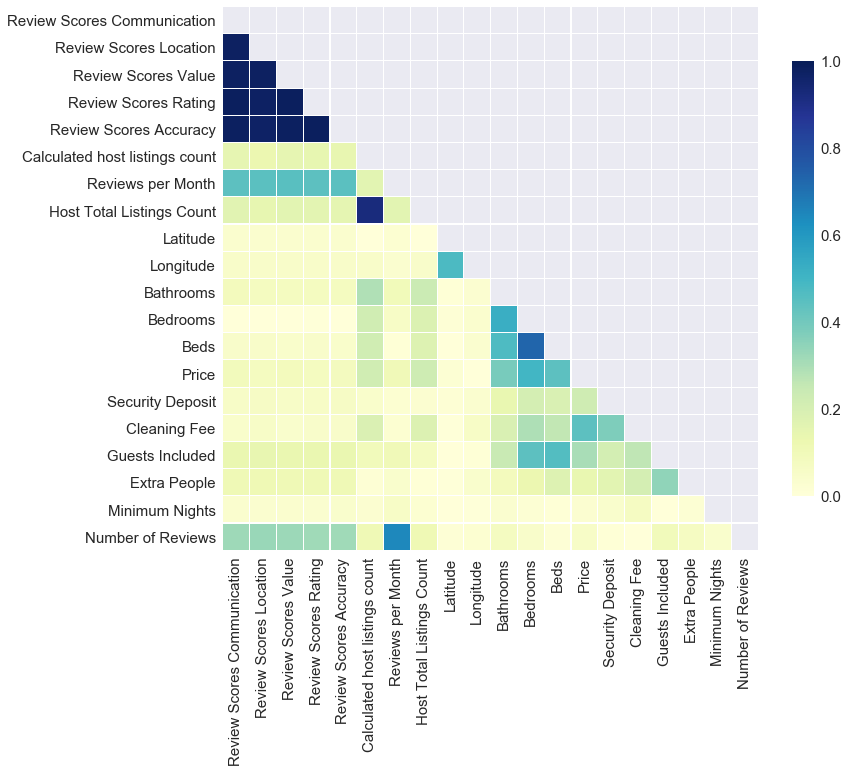

In [310]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(numeric_data.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Observamos que con respecto a la variable objetivo, tan solo están altamente correladas las caracteristicas numericas de:

    - Numero de habitaciones
    - Numero de camas
    - Número de baños

Exploracion de la distribucion de las variables numericas

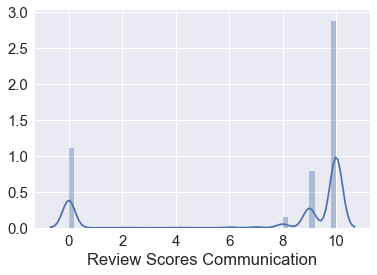

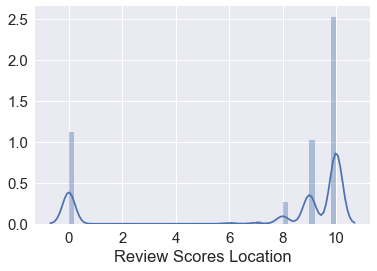

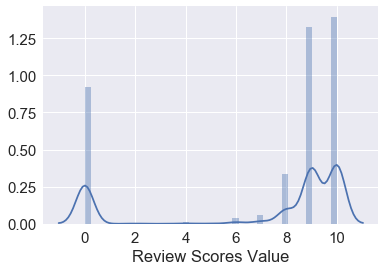

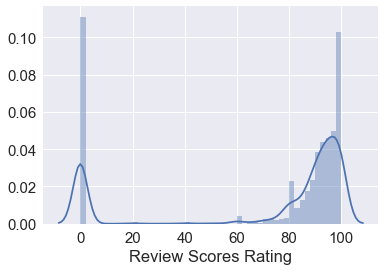

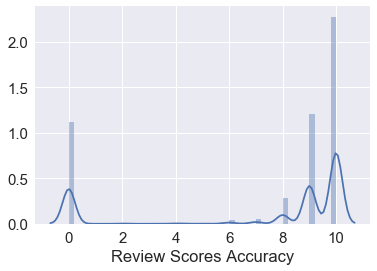

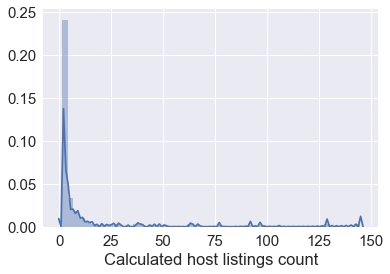

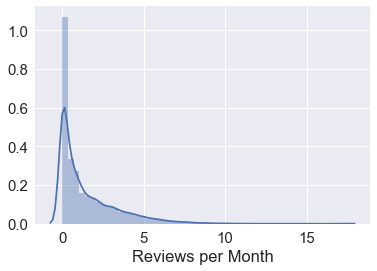

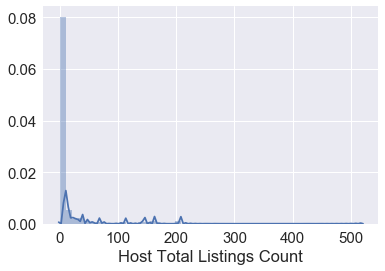

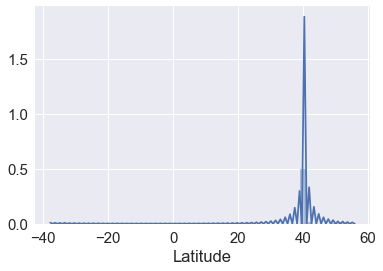

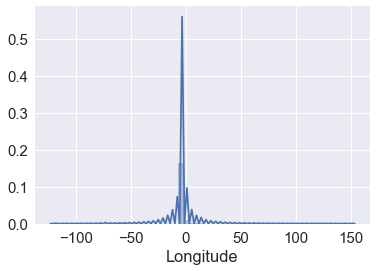

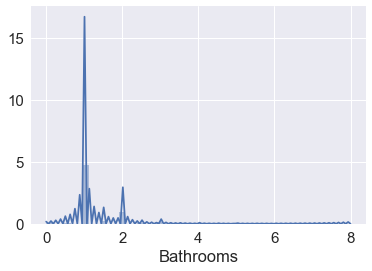

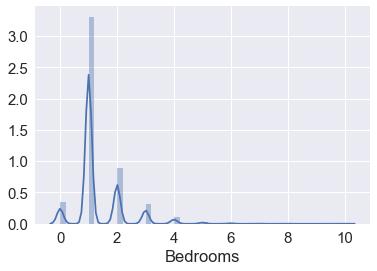

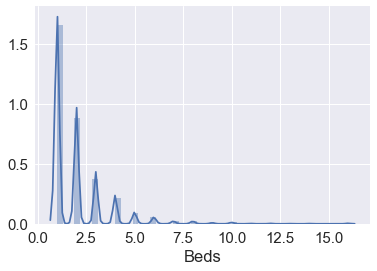

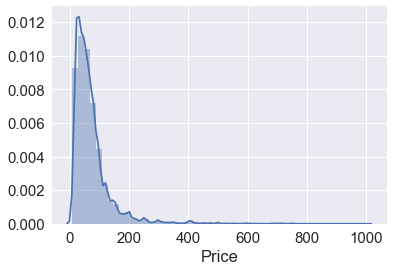

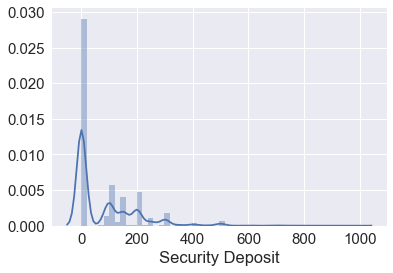

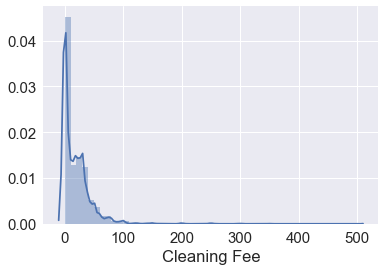

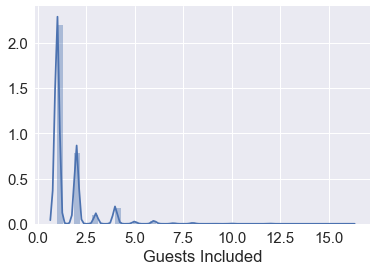

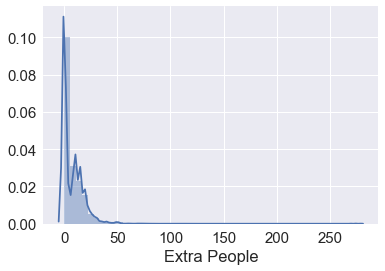

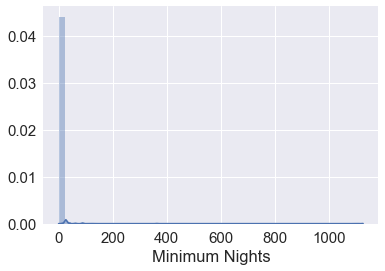

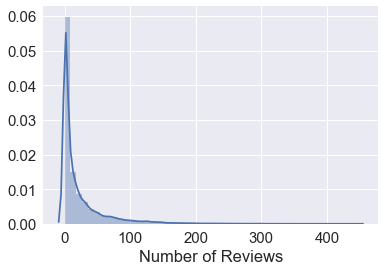

In [311]:
for i, col in enumerate(numeric_data.columns):
    plt.figure(i)
    sns.distplot(numeric_data[col])

## Split Train y Test data

In [419]:
X = data_cleaned.drop('Price', axis=1)
y = data_cleaned['Price']

In [313]:
from sklearn.model_selection import train_test_split

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Engineering

En esta seccion llevaremos a cabo el tratamiento apropiado de las dimensiones. Para las variables categoricas realizaremos la tecnica de One-Hot Encoding (que explicaremos mas adelante) y para las variables numericas realizaremos un escalado.

### Escalado de Variables Numericas

In [267]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [421]:
numerical_cols = X.select_dtypes(['number']).columns
numerical_cols

Index(['Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Review Scores Rating', 'Review Scores Accuracy',
       'Calculated host listings count', 'Reviews per Month',
       'Host Total Listings Count', 'Latitude', 'Longitude', 'Bathrooms',
       'Bedrooms', 'Beds', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights',
       'Number of Reviews'],
      dtype='object')

In [422]:
numerical_data = X[numerical_cols]

In [423]:
X[numerical_cols] = scaler.fit_transform(numerical_data)

In [386]:
X.head()

,Experiences Offered,Review Scores Communication,Review Scores Location,Review Scores Value,Review Scores Rating,Review Scores Accuracy,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Host Neighbourhood,Host Total Listings Count,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews
0,none,0.614893,0.646230,0.724133,0.659146,0.671081,Amsterdam,moderate,-0.317758,-0.030231,De Pijp,-0.309154,2.578960,0.621949,Apartment,Private room,-0.429521,-0.381946,-0.649376,Real Bed,0.997572,0.232050,-0.503559,-0.654133,-0.004575,-0.279224
1,none,0.614893,0.646230,0.470153,0.659146,0.671081,None,strict,-0.360026,-0.572367,No data,-0.338422,2.329341,0.586464,Apartment,Entire home/apt,-0.429521,-0.381946,-0.649376,Real Bed,-0.669896,-0.680042,-0.503559,-0.654133,4.624859,-0.410423
2,none,0.614893,0.646230,0.724133,0.736202,0.671081,None,strict,-0.360026,-0.774984,West Austin,-0.338422,-2.219180,-6.648951,House,Entire home/apt,1.104744,1.844742,0.595881,Real Bed,-0.669896,8.440884,-0.503559,-0.654133,-0.004575,-0.567862
3,none,-1.839959,-1.831603,-1.815666,-1.832339,-1.824837,None,flexible,-0.317758,-0.807841,Glòries - El Parc,-0.309154,0.196155,0.429522,Apartment,Private room,1.104744,-0.381946,-0.649376,Real Bed,-0.669896,-0.497624,-0.503559,0.637464,-0.167011,-0.594102
4,none,0.614893,0.646230,0.470153,0.427977,0.421489,None,strict,-0.190955,-0.194515,Sant Gervasi - Galvany,0.246939,0.196499,0.426357,Apartment,Entire home/apt,-0.429521,-0.381946,-0.649376,Real Bed,1.831306,0.049632,-0.503559,-0.654133,-0.085793,0.193092


In [424]:
X_final = pd.get_dummies(X)

In [388]:
X_final.shape

(14665, 466)

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

## Training and Testing a Decision Tree Regressor

In [336]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree

best mean cross-validation score: 0.454
best parameters: {'max_depth': 7}


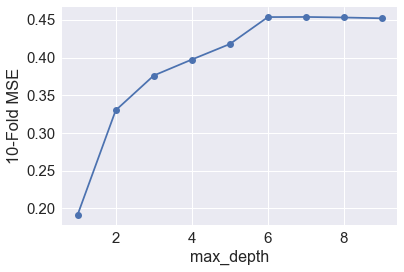

In [339]:
maxDepth = range(1,10)
numLeaves = 
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [341]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo-2).fit(X_train,y_train)

print("Score Train: ",treeModel.score(X_train,y_train))
print("Score Test: ",treeModel.score(X_test,y_test))


Score Train:  0.5427023965488852
Score Test:  0.44292420470609717


## Training and Testing a Random Forest

best mean cross-validation score: 0.521
best parameters: {'max_depth': 14}


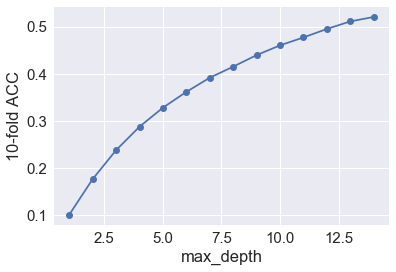

In [342]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [344]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=14,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Score Train: ",bagModel.score(X_train,y_train))
print("Score Test: ",bagModel.score(X_test,y_test))

Score Train:  0.6788619541417192
Score Test:  0.5172724384074833


## Importancia y Dependencia

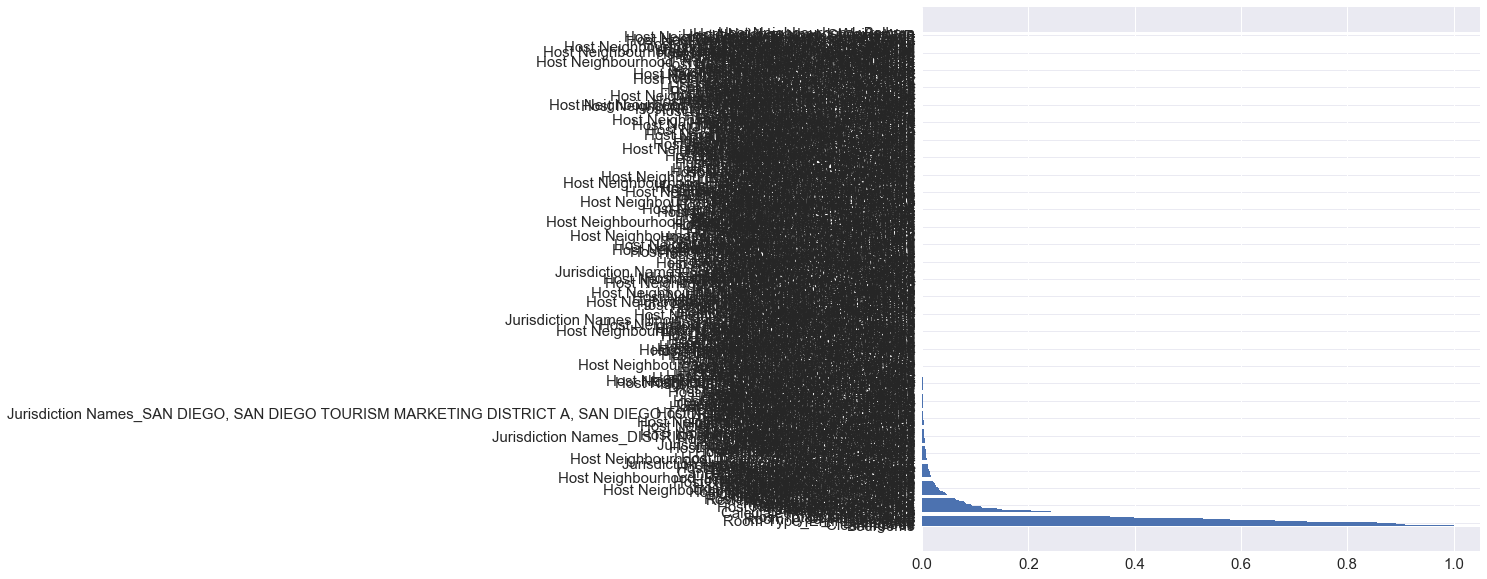

In [346]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),X_train.columns[indices])
plt.show()

## Train and Test a Gradiant Boost Regressor

In [347]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000] 
learningRate = [0.1,0.05] 

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.577
best parameters: {'learning_rate': 0.1, 'n_estimators': 1000}


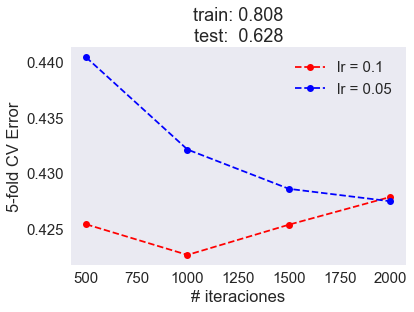

In [348]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lRateOptimo, n_estimators=nEstimatorsOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

## Opcion 2: Seleccionando las Variables mas Importantes

In [354]:
from sklearn.feature_selection import SelectFromModel

In [355]:
sel = SelectFromModel(bagModel)

In [357]:
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [358]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [359]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

40

In [360]:
print(selected_feat)

Index(['Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Review Scores Rating', 'Review Scores Accuracy',
       'Calculated host listings count', 'Reviews per Month',
       'Host Total Listings Count', 'Latitude', 'Longitude', 'Bathrooms',
       'Bedrooms', 'Beds', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights',
       'Number of Reviews', 'Jurisdiction Names_MALIBU',
       'Jurisdiction Names_None', 'Jurisdiction Names_Paris',
       'Cancellation Policy_flexible', 'Cancellation Policy_moderate',
       'Cancellation Policy_strict', 'Host Neighbourhood_Cortes',
       'Host Neighbourhood_Invalides - Ecole Militaire',
       'Host Neighbourhood_La Latina', 'Host Neighbourhood_Malibu',
       'Host Neighbourhood_No data', 'Host Neighbourhood_Paddington',
       'Host Neighbourhood_Palacio', 'Host Neighbourhood_Tsim Sha Tsui',
       'Host Neighbourhood_Vesterbro', 'Host Neighbourhood_West Austin',


In [362]:
pd.series(sel.estimator_,feature_importances_,sel.ravel()).hist()

AttributeError: module 'pandas' has no attribute 'series'

In [425]:
X_best_features = X_final[selected_feat]


In [426]:
X_best_features.shape

(14665, 40)

In [427]:
y.shape

(14665,)

In [428]:
X_train, X_test, y_train, y_test = train_test_split(X_best_features, y, test_size=0.2, random_state=42)

In [429]:
X_train.shape

(11732, 40)

In [391]:
X_train.head()

,Review Scores Communication,Review Scores Location,Review Scores Value,Review Scores Rating,Review Scores Accuracy,Calculated host listings count,Reviews per Month,Host Total Listings Count,Latitude,Longitude,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews,Jurisdiction Names_MALIBU,Jurisdiction Names_None,Jurisdiction Names_Paris,Cancellation Policy_flexible,Cancellation Policy_moderate,Cancellation Policy_strict,Host Neighbourhood_Cortes,Host Neighbourhood_Invalides - Ecole Militaire,Host Neighbourhood_La Latina,Host Neighbourhood_Malibu,Host Neighbourhood_No data,Host Neighbourhood_Paddington,Host Neighbourhood_Palacio,Host Neighbourhood_Tsim Sha Tsui,Host Neighbourhood_Vesterbro,Host Neighbourhood_West Austin,Property Type_Apartment,Property Type_House,Property Type_Villa,Room Type_Entire home/apt,Room Type_Private room
6826,0.614893,-0.097120,-0.291787,-0.034360,-0.077694,-0.360026,-0.753079,-0.338422,-0.152380,0.466602,5.707538,4.071429,4.954280,3.498774,-0.680042,-0.503559,-0.654133,0.320298,-0.541622,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
750,-1.839959,-1.831603,-1.815666,-1.832339,-1.824837,-0.360026,-0.807841,-0.338422,0.197593,0.427834,-0.429521,-0.381946,-0.649376,-0.669896,-0.680042,-0.503559,-0.654133,-0.085793,-0.594102,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
11056,0.614893,0.646230,0.724133,0.633460,0.671081,-0.360026,1.037613,-0.338422,-0.005568,0.021009,2.639008,1.844742,0.595881,0.163838,-0.132787,-0.503559,1.067997,-0.167011,-0.305464,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
12167,0.614893,0.646230,0.724133,0.736202,0.671081,-0.360026,-0.791412,-0.338422,-0.013643,0.013240,2.639008,1.844742,1.218509,-0.669896,1.144143,2.906202,1.929061,-0.167011,-0.567862,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
12200,0.614893,0.646230,0.724133,0.633460,0.671081,-0.360026,0.172385,-0.338422,-0.004767,0.020699,-0.429521,-0.381946,-0.649376,-0.669896,-0.497624,-0.503559,-0.654133,-0.167011,0.114373,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [394]:
y_train.head()

6826     428.0
750       35.0
11056     49.0
12167    185.0
12200     19.0
Name: Price, dtype: float64

In [396]:
y_series = pd.series(y_train)

AttributeError: module 'pandas' has no attribute 'series'

In [397]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [399]:
diabetes = load_diabetes()

In [401]:

X = diabetes.data
y = diabetes.target

In [404]:
X.dtype

dtype('float64')

In [406]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## Train a XGBoost Regressor

In [407]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from numpy.random import uniform, randint

In [430]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_train.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [431]:
xgb_model = XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train, y_train)

report_best_scores(search.cv_results_, 1)

TypeError: object of type 'float' has no len()